In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
sb.set_style()

In [57]:
netf = []
for file in range(20):
    with open(f'net-captures/1000-{file}-clients-net.log') as f:
        netf.append(f.read())

In [58]:
dfs = []
for f in netf:
    brokercons = []
    tmp = f.split('\n')
    for line in tmp:
        if "./bin/broker" in line:
            brokercons.append(line)
    for i in range(len(brokercons)):
        brokercons[i] = brokercons[i].split('\t')
    for i in range(len(brokercons)):
        brokercons[i].pop(0)
    df = pd.DataFrame(brokercons, columns=['sent', 'recv'])
    df['time'] = df.index
    dfs.append(df)

In [59]:
for i in range(len(dfs)):
    dfs[i] = dfs[i].iloc[0:19]
    dfs[i]['sent'] = dfs[i]['sent'].astype(np.float64)
    dfs[i]['recv'] = dfs[i]['recv'].astype(np.float64)


/tmp/ipykernel_202446/4014215091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]['sent'] = dfs[i]['sent'].astype(np.float64)
/tmp/ipykernel_202446/4014215091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]['recv'] = dfs[i]['recv'].astype(np.float64)


/home/decarv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/decarv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


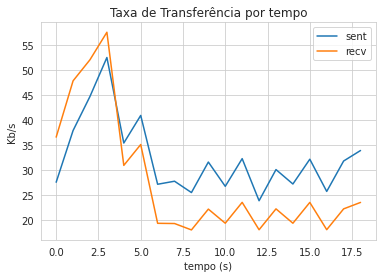

In [60]:
sb.lineplot(dfs[2]['time'], dfs[2]['sent'])
sb.lineplot(dfs[2]['time'], dfs[2]['recv'])
plt.legend(['sent', 'recv'])
plt.ylabel('Kb/s')
plt.title('Taxa de Transferência por tempo')
plt.xlabel('tempo (s)');

/home/decarv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/decarv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='sent'>

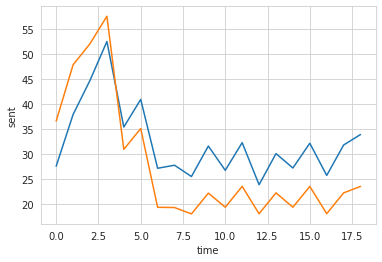

In [61]:
sb.lineplot(dfs[2]['time'], dfs[2]['sent'])
sb.lineplot(dfs[2]['time'], dfs[2]['recv'])

In [62]:
dfs_mean =[]
dfs_sum = []
for i in range(len(dfs)):
    dfs_mean.append(dfs[i].mean())
    dfs_sum.append(dfs[i].sum())

In [63]:
df_mean = pd.DataFrame(dfs_mean)

In [64]:
df_sum = pd.DataFrame(dfs_sum)

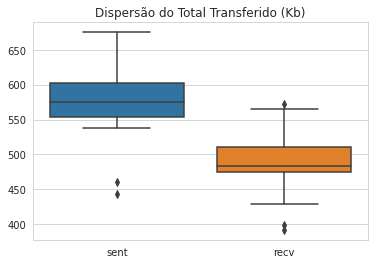

In [65]:
sb.boxplot(data=df_sum[['sent', 'recv']])
plt.title('Dispersão do Total Transferido (Kb)');

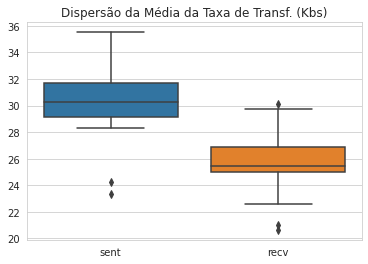

In [66]:
sb.boxplot(data=df_mean[['sent', 'recv']])
plt.title('Dispersão da Média da Taxa de Transf. (Kbs)');